In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.express as px
import os
import seaborn as sns

In [9]:
df = pd.read_csv('C:/Users/grgur/OneDrive/Desktop/finals/data/playereda/playereda.csv')
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,McKinley Wright IV,PG,24.0,DAL,20.0,1.0,10.3,1.2,2.5,0.469,...,0.636,0.3,1.0,1.3,1.9,0.4,0.2,0.6,0.9,2.9
645,Thaddeus Young,PF,34.0,TOR,49.0,9.0,15.5,2.1,3.8,0.562,...,0.692,1.4,1.8,3.2,1.4,1.1,0.1,0.8,1.8,4.7
646,Trae Young,PG,24.0,ATL,54.0,54.0,35.3,8.5,19.8,0.429,...,0.889,0.7,2.2,2.9,10.2,1.1,0.1,4.1,1.5,27.0
647,Cody Zeller,C,30.0,MIA,3.0,0.0,15.7,2.7,4.0,0.667,...,0.500,1.7,1.0,2.7,1.0,0.3,1.0,0.7,3.0,6.3


In [10]:
print(df.dtypes)

Player     object
Pos        object
Age       float64
Tm         object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object


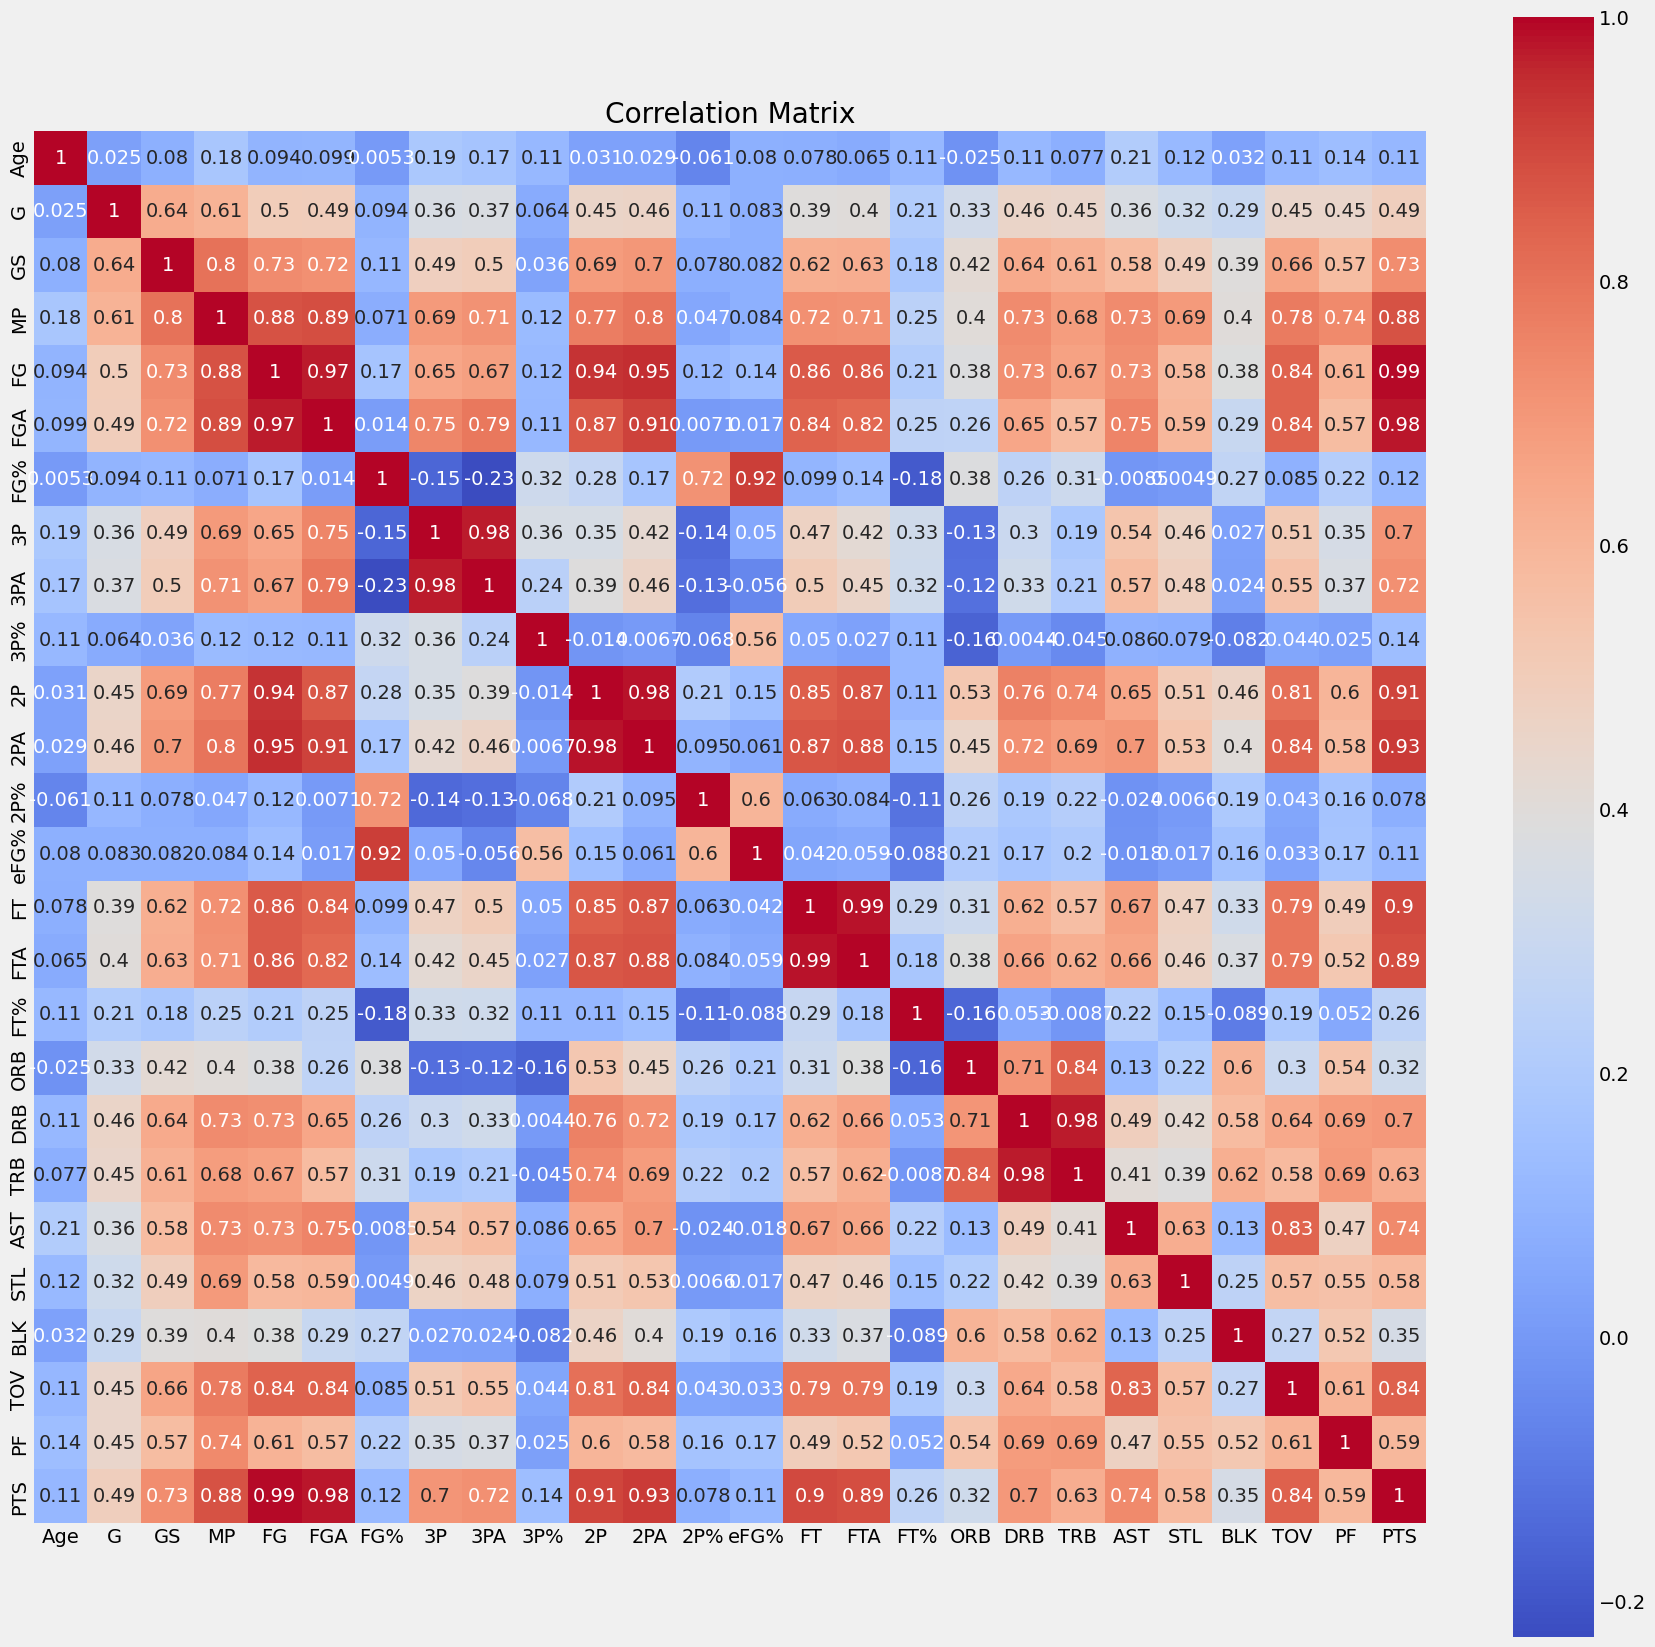

In [11]:
columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
           'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

correlation_matrix = df[columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation Matrix')
plt.show()


In [12]:

columns = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
           'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Calculate the correlation matrix
correlation_matrix = df[columns].corr()

# Find the highest correlations (excluding 1 and 0)
highest_correlations = []
for column in correlation_matrix.columns:
    for index, value in correlation_matrix[column].items():
        if (value > 0 and value < 1) or (value < 0 and value > -1):
            highest_correlations.append((column, index, value))

# Sort the correlations by magnitude
highest_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Print the highest correlations
print("Highest Correlations (excluding 1 and 0):")
for correlation in highest_correlations:
    print(f"{correlation[0]} - {correlation[1]}: {correlation[2]}")


Highest Correlations (excluding 1 and 0):
FG - PTS: 0.9910591138455171
PTS - FG: 0.9910591138455171
FT - FTA: 0.9851463338199177
FTA - FT: 0.9851463338199177
2P - 2PA: 0.9821368128929291
2PA - 2P: 0.9821368128929291
FGA - PTS: 0.9806697758469504
PTS - FGA: 0.9806697758469504
DRB - TRB: 0.9755419778192631
TRB - DRB: 0.9755419778192631
3P - 3PA: 0.9750919613494424
3PA - 3P: 0.9750919613494424
FG - FGA: 0.9749032789305505
FGA - FG: 0.9749032789305505
FG - 2PA: 0.9503393190140725
2PA - FG: 0.9503393190140725
FG - 2P: 0.93882022715732
2P - FG: 0.93882022715732
2PA - PTS: 0.9273431447533587
PTS - 2PA: 0.9273431447533587
FG% - eFG%: 0.918563476221038
eFG% - FG%: 0.918563476221038
FGA - 2PA: 0.9120084323481249
2PA - FGA: 0.9120084323481249
2P - PTS: 0.9057690507917812
PTS - 2P: 0.9057690507917812
FT - PTS: 0.8985494785970488
PTS - FT: 0.8985494785970488
FTA - PTS: 0.8865398584123669
PTS - FTA: 0.8865398584123669
MP - FGA: 0.8859998867488506
FGA - MP: 0.8859998867488506
2PA - FTA: 0.87960526555

In [13]:
df = df.dropna()

C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

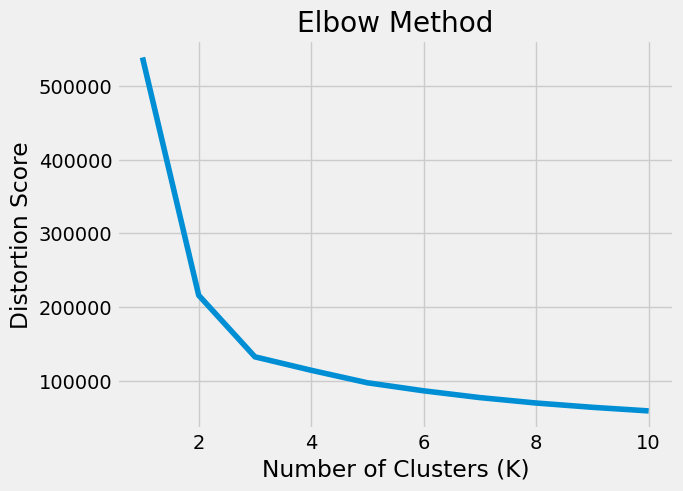

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


# Select the columns for clustering
cols_to_cluster = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
                   'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Create an empty list to store distortion scores
distortions = []

# Perform K-means clustering for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[cols_to_cluster])
    distortions.append(kmeans.inertia_)

# Plot the distortion scores
plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion Score')
plt.show()


C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

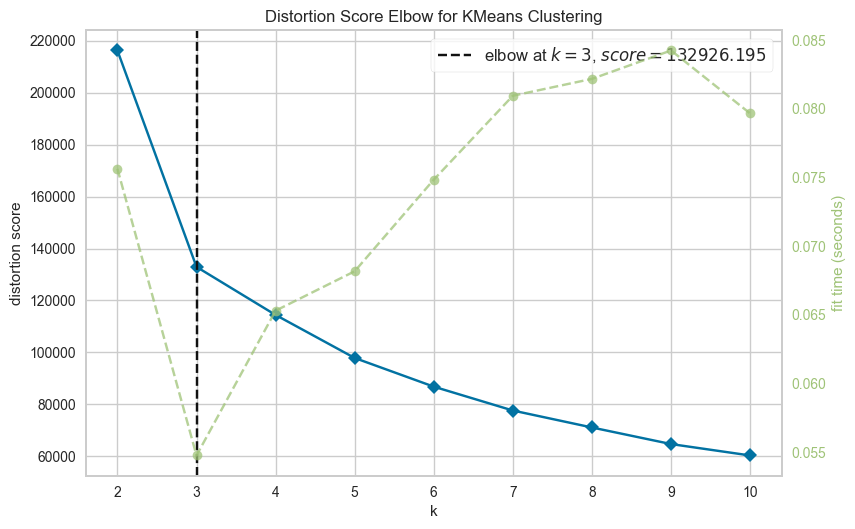

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd


# Select the columns for clustering
cols_to_cluster = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
                   'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Create a subset of data for PCA (if required)
pca_data = df[cols_to_cluster]

# Instantiate the KMeans model
kmeans_model = KMeans()

# Instantiate the KElbowVisualizer with the KMeans model and the number of clusters to evaluate (k=10)
elbow_visualizer = KElbowVisualizer(kmeans_model, k=10)

# Fit the visualizer to the PCA data
elbow_visualizer.fit(pca_data)

# Display the elbow plot
elbow_visualizer.show()


In [17]:
from sklearn.cluster import AgglomerativeClustering


# Select the columns to use for clustering
cols_to_cluster = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

# Create a subset of the data with the selected columns
subset_data = df[cols_to_cluster]

# Instantiate the Agglomerative Clustering model with the desired number of clusters
AC = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict the clusters
yhat_AC = AC.fit_predict(subset_data)

# Add the cluster labels to the original DataFrame
df["Clusters"] = yhat_AC


C:\Users\grgur\AppData\Local\Temp\ipykernel_9796\922261185.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clusters"] = yhat_AC


In [18]:
df.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Clusters
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2,1
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,1
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2,0
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0,2
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4,1
5,Nickeil Alexander-Walker,SG,24.0,TOT,40.0,3.0,14.5,2.3,4.9,0.479,...,0.3,1.4,1.7,2.0,0.6,0.4,1.2,1.5,6.3,2
6,Nickeil Alexander-Walker,SG,24.0,UTA,36.0,3.0,14.7,2.3,4.7,0.488,...,0.2,1.4,1.6,2.1,0.7,0.4,1.3,1.6,6.3,2
7,Nickeil Alexander-Walker,SG,24.0,MIN,4.0,0.0,13.0,2.5,6.0,0.417,...,0.5,1.5,2.0,0.5,0.3,0.5,1.0,0.8,6.3,2
8,Grayson Allen,SG,27.0,MIL,56.0,54.0,27.6,3.4,7.8,0.440,...,0.9,2.5,3.4,2.4,0.8,0.2,1.1,1.6,10.5,1
9,Jarrett Allen,C,24.0,CLE,57.0,57.0,33.2,6.2,9.4,0.654,...,3.2,6.7,9.9,1.6,0.8,1.2,1.5,2.2,14.8,1


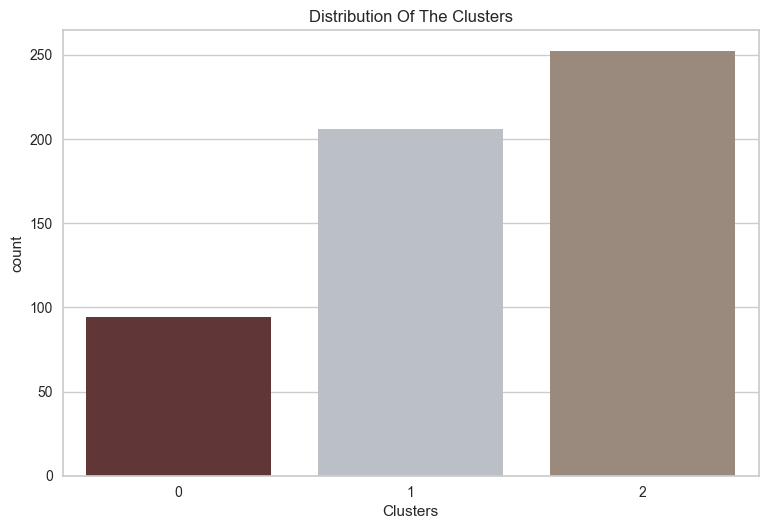

In [21]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

C:\Users\grgur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


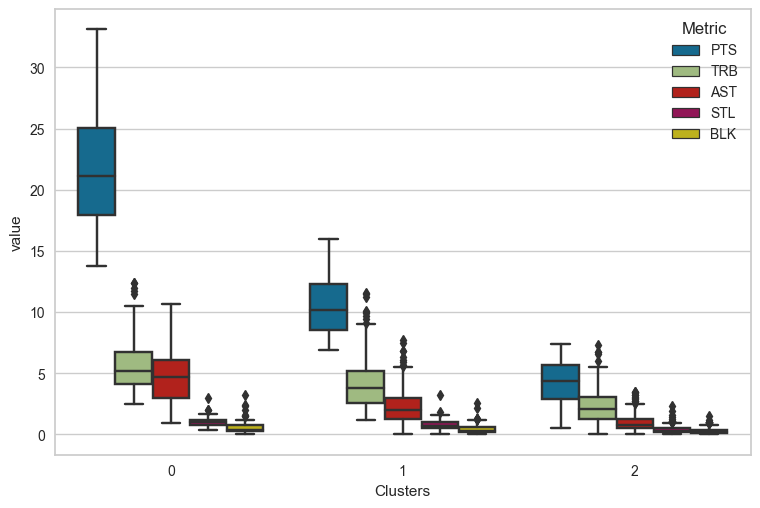

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the columns to use for clustering
cols_to_cluster = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

# Scale the selected columns
scaler = StandardScaler()
nba_data_scaled = scaler.fit_transform(df[cols_to_cluster])

# Create a KMeans object with n clusters
n= 3
kmeans = KMeans(n_clusters=n)

# Fit the KMeans object to the scaled data
kmeans.fit(nba_data_scaled)

# Melt the data to long format for seaborn boxplot
nba_data_melted = pd.melt(df, id_vars=['Clusters'], value_vars=cols_to_cluster, var_name='Metric')

# Create a box plot of the selected metrics, grouped by cluster label
sns.boxplot(data=nba_data_melted, x='Clusters', y='value', hue='Metric')
plt.show()

In [25]:
# Iterate over the clusters and print the data points in each cluster
for cluster in range(n):
    print(f"Cluster {cluster}:")
    cluster_data = df[df['Clusters'] == cluster]
    print(cluster_data)
    print("\n")


Cluster 0:
                    Player Pos   Age   Tm     G    GS    MP    FG   FGA  \
2              Bam Adebayo   C  25.0  MIA  57.0  57.0  35.0   8.4  15.7   
12   Giannis Antetokounmpo  PF  28.0  MIL  48.0  48.0  32.5  11.1  20.7   
15              OG Anunoby  SF  25.0  TOR  48.0  48.0  35.8   6.1  13.4   
20           Deandre Ayton   C  24.0  PHO  53.0  53.0  30.3   8.2  13.8   
25             LaMelo Ball  PG  21.0  CHO  36.0  36.0  35.2   8.2  20.0   
..                     ...  ..   ...  ...   ...   ...   ...   ...   ...   
619      Russell Westbrook  PG  34.0  LAC   2.0   2.0  32.5   6.5  11.5   
625         Andrew Wiggins  SF  27.0  GSW  37.0  37.0  32.2   6.8  14.3   
637        Zion Williamson  PF  22.0  NOP  29.0  29.0  33.0   9.8  16.2   
642         Christian Wood   C  27.0  DAL  50.0  17.0  27.4   6.4  12.2   
646             Trae Young  PG  24.0  ATL  54.0  54.0  35.3   8.5  19.8   

       FG%  ...  ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  Clusters  
2    0.536  

In [30]:
def evaluate_performance(df, cluster_column, metrics):
    for cluster_label in df[cluster_column].unique():
        print(f"Cluster {cluster_label}:")
        cluster_data = df[df[cluster_column] == cluster_label]
        if cluster_label == 3:
            defensive_metrics = ['DRB', 'STL', 'BLK']
            top_defensive_players = cluster_data.nlargest(5, defensive_metrics)
            for index, row in top_defensive_players.iterrows():
                player_name = row['Player']
                metric_values = ', '.join(f"{metric}: {row[metric]}" for metric in defensive_metrics)
                print(f"Player: {player_name}")
                print(f"Defensive Metrics: {metric_values}")
                print("")
        else:
            top_performers = cluster_data.nlargest(10, metrics)
            for index, row in top_performers.iterrows():
                player_name = row['Player']
                metric_values = ', '.join(f"{metric}: {row[metric]}" for metric in metrics)
                print(f"Player: {player_name}")
                print(f"Metrics: {metric_values}")
                print("")
        print("")

metrics_to_evaluate = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

evaluate_performance(df, 'Clusters', metrics_to_evaluate)


Cluster 1:
Player: Evan Mobley
Metrics: PTS: 16.0, TRB: 8.8, AST: 2.7, STL: 0.8, BLK: 1.3

Player: De'Andre Hunter
Metrics: PTS: 15.6, TRB: 4.3, AST: 1.4, STL: 0.5, BLK: 0.2

Player: Spencer Dinwiddie
Metrics: PTS: 15.5, TRB: 3.8, AST: 5.7, STL: 1.0, BLK: 0.0

Player: Tobias Harris
Metrics: PTS: 15.3, TRB: 5.8, AST: 2.5, STL: 1.0, BLK: 0.5

Player: P.J. Washington
Metrics: PTS: 15.3, TRB: 4.8, AST: 2.4, STL: 0.9, BLK: 1.1

Player: Jaden Ivey
Metrics: PTS: 15.3, TRB: 3.9, AST: 4.7, STL: 0.9, BLK: 0.3

Player: Alperen Şengün
Metrics: PTS: 15.0, TRB: 8.8, AST: 3.8, STL: 0.8, BLK: 0.9

Player: Wendell Carter Jr.
Metrics: PTS: 15.0, TRB: 8.7, AST: 2.5, STL: 0.4, BLK: 0.6

Player: Jarrett Allen
Metrics: PTS: 14.8, TRB: 9.9, AST: 1.6, STL: 0.8, BLK: 1.2

Player: Saddiq Bey
Metrics: PTS: 14.8, TRB: 4.7, AST: 1.6, STL: 1.0, BLK: 0.2


Cluster 0:
Player: Luka Dončić
Metrics: PTS: 33.1, TRB: 8.8, AST: 8.1, STL: 1.5, BLK: 0.5

Player: Joel Embiid
Metrics: PTS: 33.0, TRB: 10.4, AST: 4.1, STL: 1.1, 

Cluster 1:


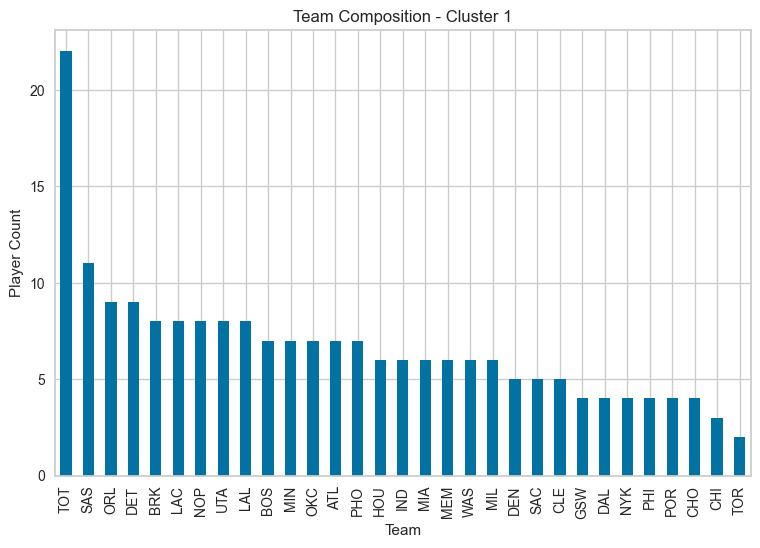


Cluster 0:


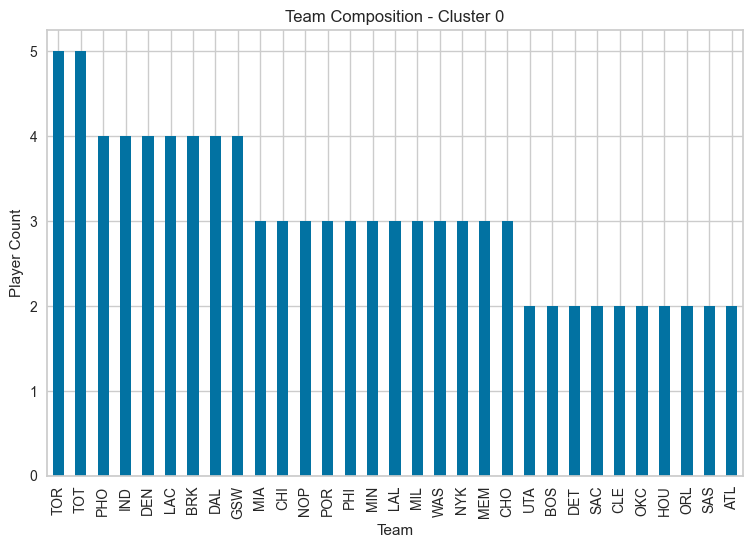


Cluster 2:


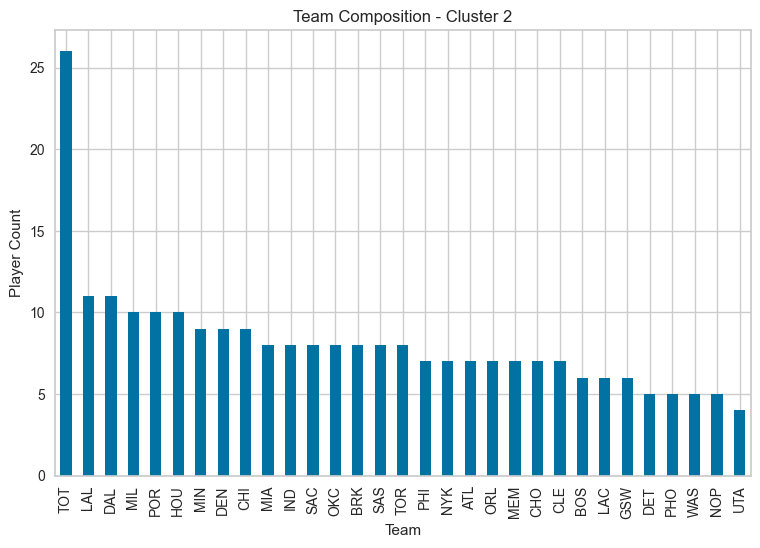

In [28]:
import matplotlib.pyplot as plt

def analyze_team_composition(df, cluster_column):
    for cluster_label in df[cluster_column].unique():
        print(f"Cluster {cluster_label}:")
        cluster_data = df[df[cluster_column] == cluster_label]
        team_counts = cluster_data['Tm'].value_counts()
        team_counts.plot(kind='bar')
        plt.title(f"Team Composition - Cluster {cluster_label}")
        plt.xlabel("Team")
        plt.ylabel("Player Count")
        plt.show()
        print("")

analyze_team_composition(df, 'Clusters')


Cluster 1:


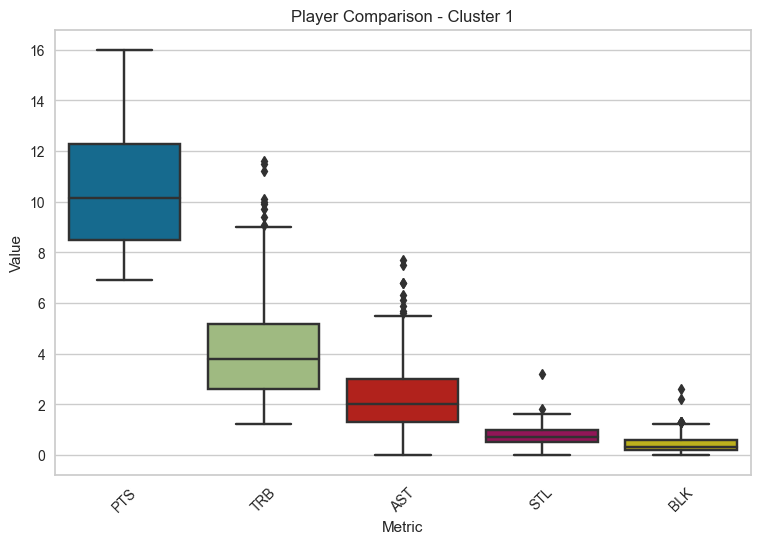


Cluster 0:


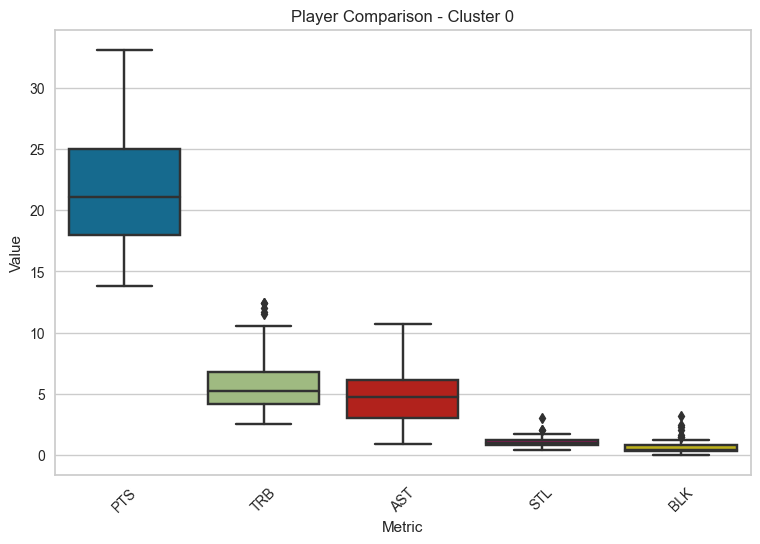


Cluster 2:


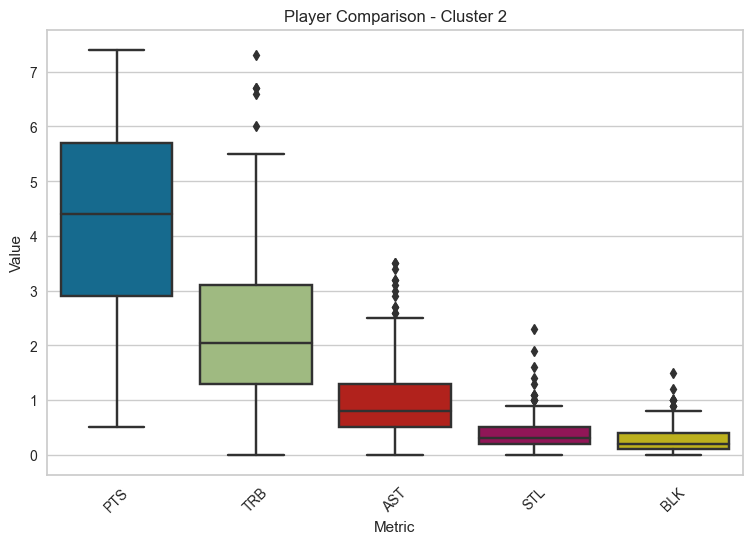

In [29]:
import seaborn as sns

def compare_players(df, cluster_column, metrics):
    for cluster_label in df[cluster_column].unique():
        print(f"Cluster {cluster_label}:")
        cluster_data = df[df[cluster_column] == cluster_label]
        cluster_metrics = cluster_data[metrics] if cluster_label != 3 else cluster_data[['DRB', 'STL', 'BLK']]
        sns.boxplot(data=cluster_metrics)
        plt.title(f"Player Comparison - Cluster {cluster_label}")
        plt.xlabel("Metric")
        plt.ylabel("Value")
        plt.xticks(rotation=45)
        plt.show()
        print("")

metrics_to_compare = ['PTS', 'TRB', 'AST', 'STL', 'BLK']

compare_players(df, 'Clusters', metrics_to_compare)


Cluster 0: Superstars, all-round players, best individuals on the team, focused on individual performance and carrying their team to victory

Cluster 1: Playmakers, focused on team-play instead on individual performance, most likely to pass the ball and create opportunuties for respective teamplayers

Cluster 2: Benchers, playing less minutes but contributing by entering the game as a 6th man

This is still WIP, clusters need to be upgraded and named. Clustering can be used in couple of cases: player comparison, team composition, performance evaluation, player development, scouting etc. 